In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import optimize as opt
%matplotlib widget

In [14]:
# Filename we want to analyze
#filename = 'res_2tar/a0.2_b0.005_Ji4_J1212_Jm10_t20.0.txt'
filename = 'res_2tar/a0.2_b0.005_Ji0.5_J120.3_Jm6_t20.0_dense2.txt'
# filename = 'res_2tar/a10_b10_Ji1_J125_Jm1_t20.0_dense.txt'


/tmp/ipykernel_1080484/410283752.py:8: RuntimeWarning: invalid value encountered in arccos
  omega_thres = .5*np.degrees(np.arccos(-float(parameters['Jmax'])/(2*float(parameters['J12']))))


{'alpha': '0.2', 'beta': '0.005', 'Jinit': '0.5', 'J12': '0.3', 'Jmax': '6', 'theta0': 20.0}
nan


Text(0.5, 0.98, 'J12 = 0.3, Jmax = 6, Jinit = 0.5, theta0 = 20.0°\n')

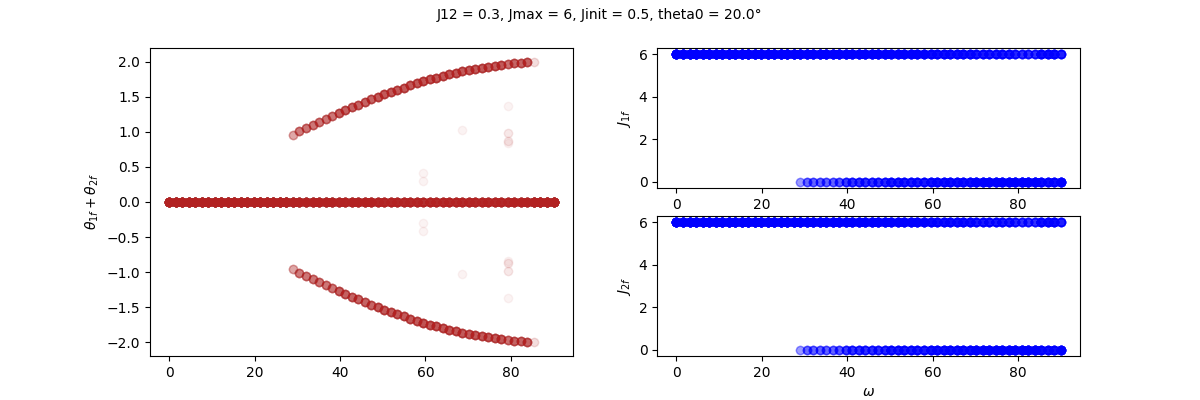

In [15]:
with open(filename, 'r') as file:
    header = file.readline().strip().split()  # get variable names from first line
    values = file.readline().strip().split()  # get values from second line
    parameters = dict(zip(header, values))  # create a dictionary with variable names as keys and values as values

# convert theta0 to degrees
parameters['theta0'] = np.degrees(float(parameters['theta0']))
omega_thres = .5*np.degrees(np.arccos(-float(parameters['Jmax'])/(2*float(parameters['J12']))))
print(parameters)
print(omega_thres)

# Create a figure with a 2x2 grid
fig = plt.figure(figsize=(12, 4))
gs = fig.add_gridspec(2, 2)

# Create the first subplot and set its size to 1x2
ax1 = fig.add_subplot(gs[:2, 0])

# Create the second subplot and set its size to 1x1
ax2 = fig.add_subplot(gs[0, 1])

# Create the third subplot and set its size to 1x1
ax3 = fig.add_subplot(gs[1, 1])

# plot the results from the file using pandas
df = pd.read_csv(filename, sep='\t', skiprows=3)
for x in np.unique(df['omega'], axis=0):
    # ax1.scatter(np.degrees(df[df['omega'] == x]['omega']), np.degrees(df[df['omega'] == x]['theta1_f'])+np.degrees(df[df['omega'] == x]['theta2_f']), label=f'omega = {np.degrees(x)}', alpha=0.05, c='firebrick')
    ax1.scatter(np.degrees(df[df['omega'] == x]['omega']), np.sin(df[df['omega'] == x]['theta1_f'])+np.sin(df[df['omega'] == x]['theta2_f']), label=f'omega = {np.degrees(x)}', alpha=0.05, c='firebrick')
    ax2.scatter(np.degrees(df[df['omega'] == x]['omega']), df[df['omega'] == x]['J1_f'], label=f'omega = {np.degrees(x)}', alpha=0.05, c='b')
    ax3.scatter(np.degrees(df[df['omega'] == x]['omega']), df[df['omega'] == x]['J2_f'], label=f'omega = {np.degrees(x)}', alpha=0.05, c='b')
    
ax1.set_ylabel(r'$\theta_{1f} + \theta_{2f}$')
# plot vertical lines for omega_thres
ax1.axvline(x=omega_thres, c='k', ls='--', label=f'omega_thres = {omega_thres:.2f}°')
ax2.set_ylabel(r'$J_{1f}$')
ax3.set_ylabel(r'$J_{2f}$')
ax3.set_xlabel(r'$\omega$')

# set the title with the parameters J12, Jmax, and theta0
fig.suptitle(f'J12 = {parameters["J12"]}, Jmax = {parameters["Jmax"]}, Jinit = {parameters["Jinit"]}, theta0 = {parameters["theta0"]}°\n', fontsize=10)

# save the figure as pdf with the parameters in the name
#fig.savefig(f'img/ode_{parameters["J12"]}_{parameters["Jmax"]}_{parameters["theta0"]}.pdf', bbox_inches='tight', dpi=300);

In [4]:
np.degrees(np.arccos(-10/24))/2

57.31215917608204

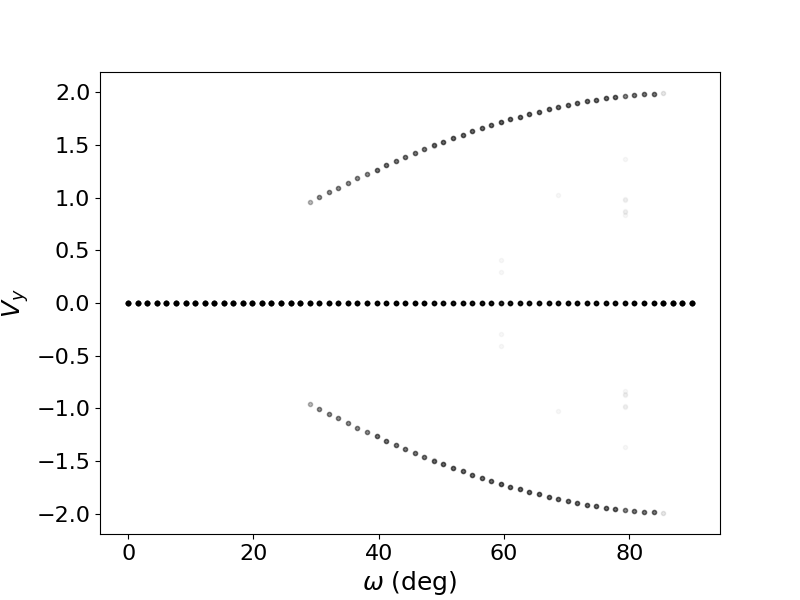

In [6]:
fig = plt.figure(figsize=(8, 6))

for x in np.unique(df['omega'], axis=0):
    plt.scatter(np.degrees(df[df['omega'] == x]['omega']), np.sin(df[df['omega'] == x]['theta1_f'])+np.sin(df[df['omega'] == x]['theta2_f']), label=f'omega = {np.degrees(x)}', alpha=0.03, c='black', marker='.')

# Set the x and y labels
plt.xlabel(r'$\omega$ (deg)', fontsize=18)
plt.ylabel(r'$V_y$', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

# set the title with the parameters J12, Jmax, and theta0
#plt.title(f'J12 = {parameters["J12"]}, Jmax = {parameters["Jmax"]}, Jinit = {parameters["Jinit"]}, theta0 = {parameters["theta0"]}°\n', fontsize=10)
#plt.title(f'J12 = {parameters["J12"]}, Jmax = {parameters["Jmax"]}, Jinit = {parameters["Jinit"]}, theta0 = {parameters["theta0"]}°\n', fontsize=10)

# save the figure as pdf with the parameters in the name
fig.savefig(f'../img/bif_{parameters["J12"]}_{parameters["Jmax"]}_{parameters["theta0"]}.pdf', bbox_inches='tight', dpi=100);

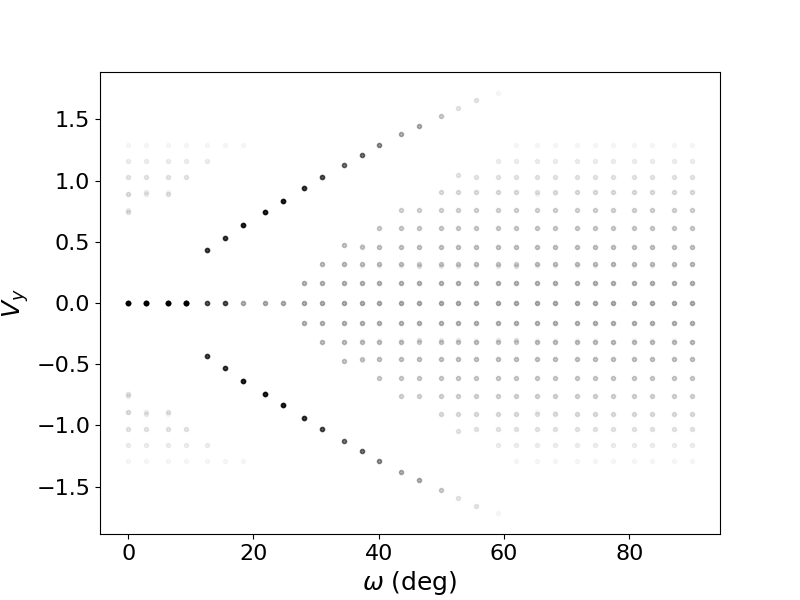

In [59]:
filename_nofeed = 'res_2tar/J1250_Jm1_t20.0_nofeed.txt'

# plot the results from the file using pandas
df = pd.read_csv(filename_nofeed, sep='\t', skiprows=3)
df = df.round(2)

fig = plt.figure(figsize=(8, 6))

for x in np.unique(df['omega'], axis=0):
    plt.scatter(np.degrees(df[df['omega'] == x]['omega']), np.sin(df[df['omega'] == x]['theta1_f'])+np.sin(df[df['omega'] == x]['theta2_f']), label=f'omega = {np.degrees(x)}', alpha=0.03, c='black', marker='.')

# Set the x and y labels
plt.xlabel(r'$\omega$ (deg)', fontsize=18)
plt.ylabel(r'$V_y$', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)


In [41]:
# add column for theta1 + theta2
df['theta1+theta2'] = df['theta1_f'] + df['theta2_f']

# convert radians to degrees
df['omega'] = np.degrees(df['omega'])
df['theta1_f'] = np.degrees(df['theta1_f'])
df['theta2_f'] = np.degrees(df['theta2_f'])
df['theta1+theta2'] = np.degrees(df['theta1+theta2'])
df_omega = df[df['omega'] == df['omega'].unique()[25]]
df_omega

,omega,theta1_i,theta2_i,theta1_f,theta2_f,theta1+theta2
2500,77.349302,0.17,-1.57,-77.349302,-77.349302,-154.698605
2501,77.349302,0.17,-1.42,-77.349302,-77.349302,-154.698605
2502,77.349302,0.17,-1.26,-77.349302,-77.349302,-154.698605
2503,77.349302,0.17,-1.11,-77.349302,-77.349302,-154.698605
2504,77.349302,0.17,-0.95,-22.345354,-22.345354,-44.690708
...,...,...,...,...,...,...
2595,77.349302,1.57,-0.80,77.349302,77.349302,154.698605
2596,77.349302,1.57,-0.64,77.349302,77.349302,154.698605
2597,77.349302,1.57,-0.48,77.349302,77.349302,154.698605
2598,77.349302,1.57,-0.33,77.349302,77.349302,154.698605


## Study of the solutions

In [20]:
df = pd.read_csv(filename, sep='\t', skiprows=3)
df = df.round(2)

# add column for theta1 + theta2
df['theta1+theta2'] = df['theta1_f'] + df['theta2_f']

# convert radians to degrees
df['omega'] = np.degrees(df['omega'])
df['theta1_f'] = np.degrees(df['theta1_f'])
df['theta2_f'] = np.degrees(df['theta2_f'])
df['theta1+theta2'] = np.degrees(df['theta1+theta2'])

for i in range(len(df['omega'].unique())):
    df_omega = df[df['omega'] == df['omega'].unique()[i]]

    #df_omega = df_omega[['omega', 'theta1_f', 'theta2_f', 'theta1+theta2', 'J1_f', 'J2_f']].value_counts()
    df_omega = df_omega[['omega', 'theta1_f', 'theta2_f', 'theta1+theta2', 'J1_f', 'J2_f']]

    # select only rows where theta1 + theta2 = 0 but theta1_f != 0 and select unique rows

    df_omega = df_omega[(df_omega['theta1+theta2']==0) & (df_omega['theta1_f']!=0)].drop_duplicates()

    # check if there are elements in the dataframe
    if df_omega.empty:
        print('No bifurcation: '+ str(i) + " - " + str(df['omega'].unique()[i]))

    # df_omega = df_omega[abs(df_omega['theta1+theta2'])==0]
    #print(df_omega)


No bifurcation: 0 - 0.0


In [33]:
df = pd.read_csv(filename, sep='\t', skiprows=3)
df = df.round(2)

# add column for theta1 + theta2
df['theta1+theta2'] = df['theta1_f'] + df['theta2_f']

# convert radians to degrees
df['omega'] = np.degrees(df['omega'])
df['theta1_f'] = np.degrees(df['theta1_f'])
df['theta2_f'] = np.degrees(df['theta2_f'])
df['theta1+theta2'] = np.degrees(df['theta1+theta2'])

df_omega = df[df['omega'] == df['omega'].unique()[25]]
df_omega = df_omega[['omega', 'theta1_i', 'theta2_i','theta1_f', 'theta2_f', 'theta1+theta2', 'J1_f', 'J2_f']]

df_omega = df_omega[(df_omega['theta1+theta2']==0) & (df_omega['J1_f']==0)]#.drop_duplicates()
print(df_omega)

          omega  theta1_i  theta2_i  theta1_f  theta2_f  theta1+theta2  J1_f  \
2503  77.349302      0.00     -1.05  0.572958 -0.572958            0.0   0.0   
2504  77.349302      0.00     -0.87  0.572958 -0.572958            0.0   0.0   
2505  77.349302      0.00     -0.70  0.572958 -0.572958            0.0   0.0   
2506  77.349302      0.00     -0.52  0.572958 -0.572958            0.0   0.0   
2507  77.349302      0.00     -0.35  0.572958 -0.572958            0.0   0.0   
2508  77.349302      0.00     -0.17  0.572958 -0.572958            0.0   0.0   
2509  77.349302      0.00      0.00  0.572958 -0.572958            0.0   0.0   
2513  77.349302      0.17     -1.05  0.572958 -0.572958            0.0   0.0   
2514  77.349302      0.17     -0.87  0.572958 -0.572958            0.0   0.0   
2515  77.349302      0.17     -0.70  0.572958 -0.572958            0.0   0.0   
2516  77.349302      0.17     -0.52  0.572958 -0.572958            0.0   0.0   
2517  77.349302      0.17     -0.35  0.5

In [25]:

#df_omega = df_omega[['omega', 'theta1_f', 'theta2_f', 'theta1+theta2', 'J1_f', 'J2_f']].value_counts()
df_omega = df_omega[['omega', 'theta1_f', 'theta2_f', 'theta1+theta2', 'J1_f', 'J2_f']]

# select only rows where theta1 + theta2 = 0 but theta1_f != 0 and select unique rows

df_omega = df_omega[(df_omega['theta1+theta2']==0)].drop_duplicates()
print(df_omega)

        omega   theta1_f   theta2_f  theta1+theta2  J1_f  J2_f
509  15.46986  14.323945 -14.323945            0.0   6.0   6.0


## Compare different parameters

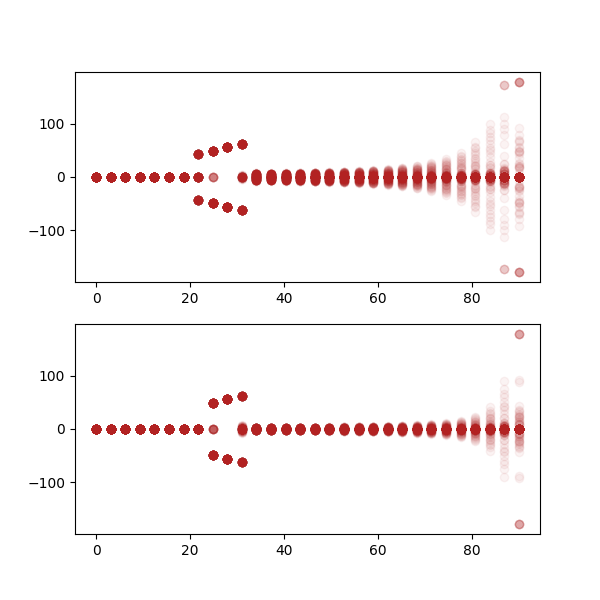

In [7]:
df1 = pd.read_csv('res_2tar/a0.2_b0.005_Ji4_J1212_Jm10_t20.0.txt', sep='\t', skiprows=3)
df2 = pd.read_csv('res_2tar/a0.2_b0.005_Ji6_J1212_Jm10_t20.0.txt', sep='\t', skiprows=3)

# create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))

for x in np.unique(df1['omega'], axis=0):
    ax1.scatter(np.degrees(df1[df1['omega'] == x]['omega']), np.degrees(df1[df1['omega'] == x]['theta1_f'])+np.degrees(df1[df1['omega'] == x]['theta2_f']), label=f'omega = {np.degrees(x)}', alpha=0.05, c='firebrick')
    ax2.scatter(np.degrees(df2[df2['omega'] == x]['omega']), np.degrees(df2[df2['omega'] == x]['theta1_f'])+np.degrees(df2[df2['omega'] == x]['theta2_f']), label=f'omega = {np.degrees(x)}', alpha=0.05, c='firebrick')


In [30]:
0.3*np.sin(np.radians(2*14.323945))-6.0*np.sin(np.radians(-14.323945+15.46986))

0.023835724339651615

## Potential

In [53]:
# define a potential function of theta1 and theta2 for a given parameter set
def potential(theta1, theta2, J12, J1, J2, omega):
    return -J12*np.cos(theta1-theta2)-J1*np.cos(theta1-omega)-J2*np.cos(theta2+omega)

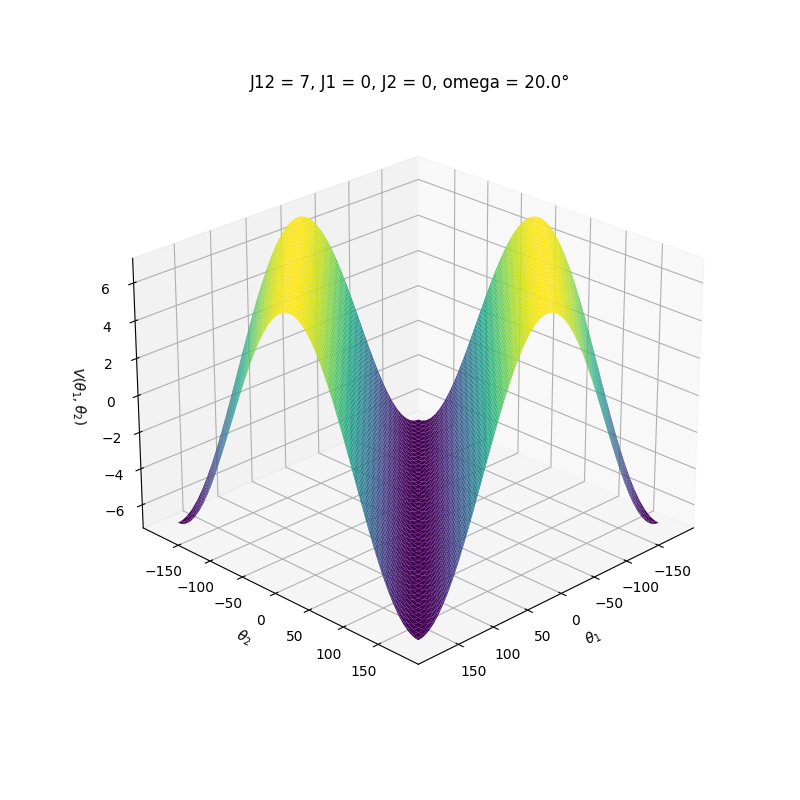

In [56]:
# 3d plot of potential function
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# create a meshgrid of theta1 and theta2
theta1 = np.linspace(-np.pi, np.pi, 100)
theta2 = np.linspace(-np.pi, np.pi, 100)
theta1, theta2 = np.meshgrid(theta1, theta2)

# define the parameters
J12 = 7
J1 = 0
J2 = 0
omega = np.radians(20)

# calculate the potential
V = potential(theta1, theta2, J12, J1, J2, omega)

# plot the potential
ax.plot_surface(np.degrees(theta1), np.degrees(theta2), V, cmap='viridis', edgecolor='none')
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')
ax.set_zlabel(r'$V(\theta_1, \theta_2)$')
ax.set_title(f'J12 = {J12}, J1 = {J1}, J2 = {J2}, omega = {np.degrees(omega)}°')

# show the plot rotated 45 degrees
ax.view_init(25, 45)
plt.show()

# save the figure
fig.savefig('img/potential_3d.pdf', bbox_inches='tight', dpi=300);

In [32]:
import plotly.graph_objs as go
import plotly.offline as offline
import numpy as np

# set the render mode to WebGL
#go.Surface.set_render_mode('webgl')
config = dict({'scrollZoom': True, 'displaylogo': False, 'modeBarButtonsToRemove': ['sendDataToCloud']})
# 3d plot of potential function
theta1 = np.linspace(-np.pi, np.pi, 100)
theta2 = np.linspace(-np.pi, np.pi, 100)

# define the parameters
J12 = 7
J1 = 0
J2 = 0
omega = np.radians(20)

# calculate the potential
V = potential(theta1, theta2, J12, J1, J2, omega)

fig = go.Figure(data=[go.Surface(x=np.degrees(theta1), y=np.degrees(theta2), z=V, colorscale='Viridis')])
fig.update_layout(scene=dict(bgcolor='white'))
offline.plot(fig, filename='img/potential.html')

'img/potential.html'

Text(0, 0.5, '$\\theta_2$')

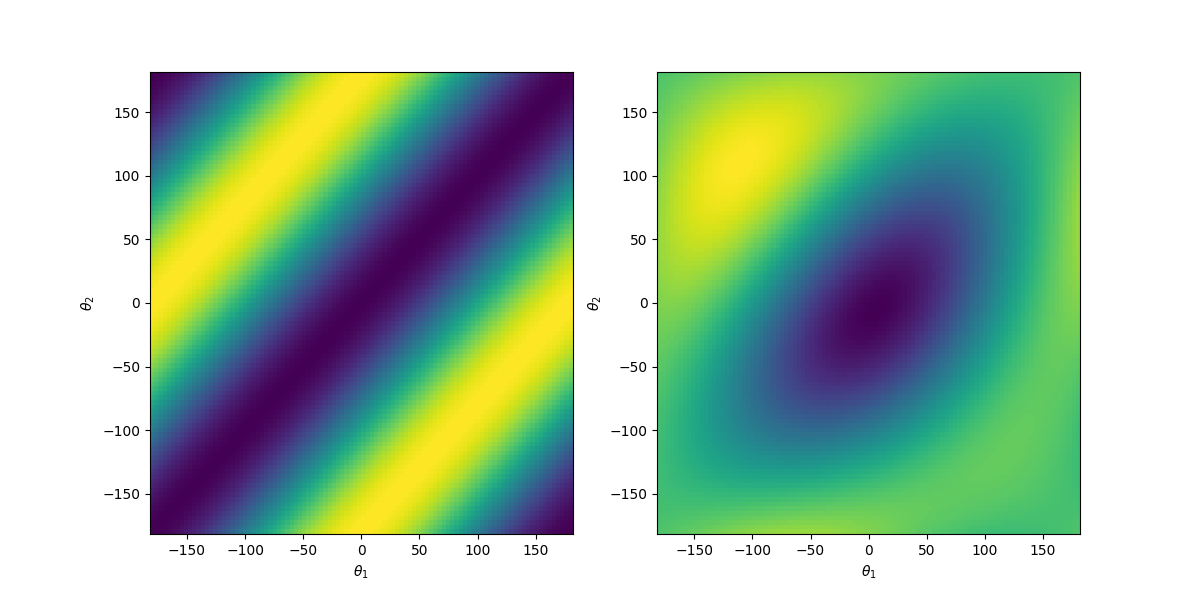

In [33]:
# plot heatmap of potential function
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# create a meshgrid of theta1 and theta2
theta1 = np.linspace(-np.pi, np.pi, 100)
theta2 = np.linspace(-np.pi, np.pi, 100)
theta1, theta2 = np.meshgrid(theta1, theta2)

# define the parameters
J12 = 7
J1 = 0
J2 = 0
omega = np.radians(40)

# calculate the potential
V = potential(theta1, theta2, J12, J1, J2, omega)

# plot the potential
ax1.pcolormesh(np.degrees(theta1), np.degrees(theta2), V, cmap='viridis')
ax1.set_xlabel(r'$\theta_1$')
ax1.set_ylabel(r'$\theta_2$')


# define the parameters
J12 = 7
J1 = 6
J2 = 6
omega = np.radians(20)

# calculate the potential
V = potential(theta1, theta2, J12, J1, J2, omega)

# plot the potential
ax2.pcolormesh(np.degrees(theta1), np.degrees(theta2), V, cmap='viridis')
ax2.set_xlabel(r'$\theta_1$')
ax2.set_ylabel(r'$\theta_2$')

MovieWriter imagemagick unavailable; using Pillow instead.


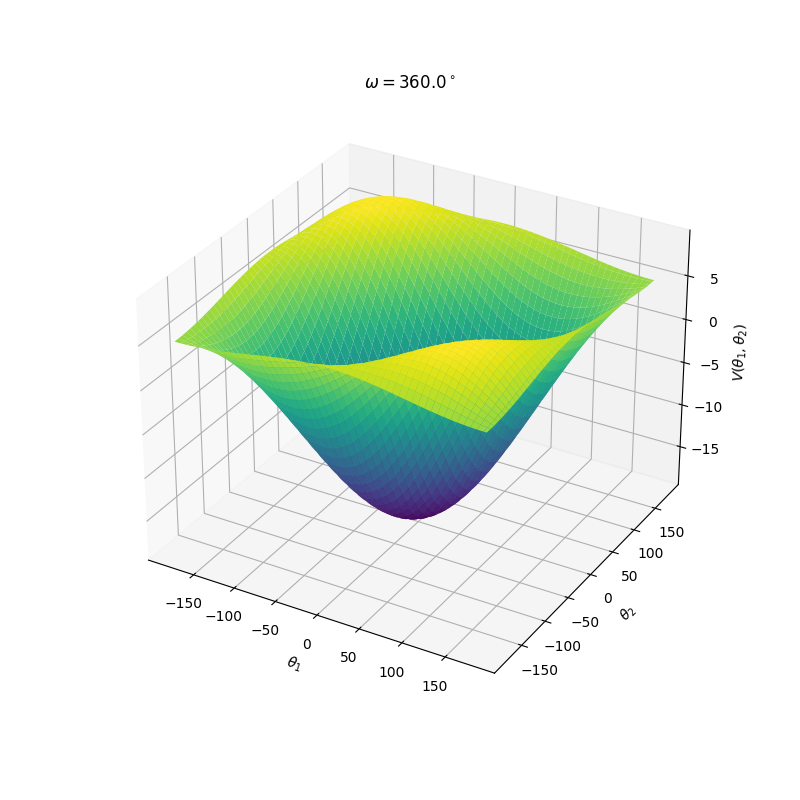

In [5]:
from matplotlib import animation, rc


# create an animation of the potential function for different values of omega
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# create a meshgrid of theta1 and theta2
theta1 = np.linspace(-np.pi, np.pi, 100)
theta2 = np.linspace(-np.pi, np.pi, 100)
theta1, theta2 = np.meshgrid(theta1, theta2)

# define the parameters
J12 = 7
J1 = 6
J2 = 6

# define the omega values
omegas = np.linspace(0, 2*np.pi, 100)

# create a function to update the plot
def update(i):
    ax.clear()
    omega = omegas[i]
    V = potential(theta1, theta2, J12, J1, J2, omega)
    ax.plot_surface(np.degrees(theta1), np.degrees(theta2), V, cmap='viridis', edgecolor='none')
    ax.set_xlabel(r'$\theta_1$')
    ax.set_ylabel(r'$\theta_2$')
    ax.set_zlabel(r'$V(\theta_1, \theta_2)$')
    ax.set_title(r'$\omega = $' + str(np.round(np.degrees(omega), 2)) + r'$^\circ$')

# create the animation
ani = animation.FuncAnimation(fig, update, frames=100, interval=100)
ani.save('potential.gif', writer='imagemagick', fps=30)

# New simulation

FileNotFoundError: [Errno 2] No such file or directory: 'results.txt'

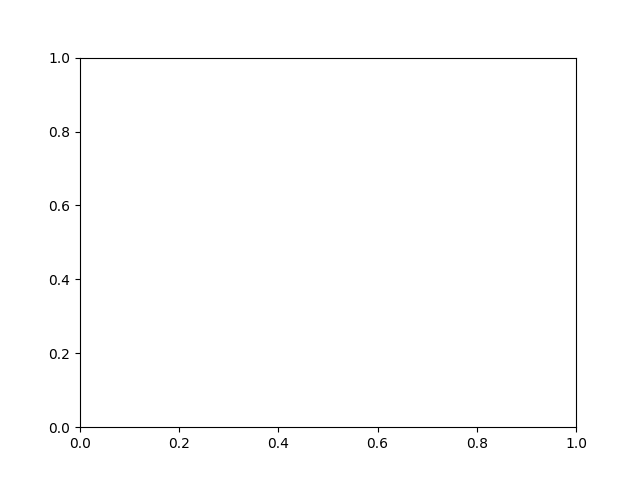

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot()

theta0 = np.radians(20)

# plot the results from the file using pandas
df = pd.read_csv('results.txt', sep='\t', skiprows=3)
for x in np.unique(df['omega'], axis=0):
    ax.scatter(np.degrees(df[df['omega'] == x]['omega']), np.degrees(df[df['omega'] == x]['theta1_f'])+np.degrees(df[df['omega'] == x]['theta2_f']), label=f'omega = {np.degrees(x)}', alpha=0.05, c='firebrick')


# for x in np.unique(om[:,0], axis=0):
#     ax.scatter(np.degrees(om[om[:,0] == x,0]), om[om[:,0] == x,3]+om[om[:,0] == x,4], label=f'omega = {np.degrees(x)}', alpha=0.05, c='firebrick')

# plot vertical lines for theta0
ax.axvline(x=np.degrees(theta0), color='k', linestyle='--')
ax.set_xlabel(r'$\omega$')
#set y label as theta1 + theta2 using latex
ax.set_ylabel(r'$\theta_{1f} + \theta_{2f}$');

{'alpha': '0.2', 'beta': '0.005', 'Jinit': '6', 'Ja': '12', 'Jmax': '10', 'theta0': 20.0}
73.22134511903964


Text(0.5, 1.0, 'Ja = 12, Jmax = 10, Jinit = 6, theta0 = 20.0°\n')

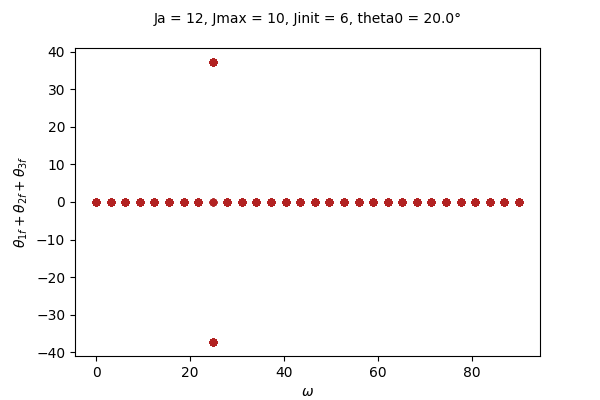

In [20]:
filename = 'res_3tar/a0.2_b0.005_Ji6_Ja12_Jm10_t20.0.txt'

with open(filename, 'r') as file:
    header = file.readline().strip().split()  # get variable names from first line
    values = file.readline().strip().split()  # get values from second line
    parameters = dict(zip(header, values))  # create a dictionary with variable names as keys and values as values

# convert theta0 to degrees
parameters['theta0'] = np.degrees(float(parameters['theta0']))
omega_thres = .5*np.degrees(np.arccos(-float(parameters['Jmax'])/float(parameters['Ja'])))
print(parameters)
print(omega_thres)


# plot the results from the file using pandas
df = pd.read_csv(filename, sep='\t', skiprows=3)

fig = plt.figure(figsize=(6, 4))

for x in np.unique(df['omega'], axis=0):
    plt.scatter(np.degrees(df[df['omega'] == x]['omega']), np.degrees(df[df['omega'] == x]['theta1_f'])+np.degrees(df[df['omega'] == x]['theta2_f'])+np.degrees(df[df['omega'] == x]['theta3_f']), s=20, label=f'omega = {np.degrees(x)}', alpha=0.5, c='firebrick')

# Set the x and y labels
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\theta_{1f} + \theta_{2f} + \theta_{3f}$')

# set the title with the parameters J12, Jmax, and theta0
plt.title(f'Ja = {parameters["Ja"]}, Jmax = {parameters["Jmax"]}, Jinit = {parameters["Jinit"]}, theta0 = {parameters["theta0"]}°\n', fontsize=10)

# save the figure as pdf with the parameters in the name
#fig.savefig(f'img/bif_{parameters["J12"]}_{parameters["Jmax"]}_{parameters["theta0"]}.pdf', bbox_inches='tight', dpi=300);

## TIME INDIPENDENT MODEL

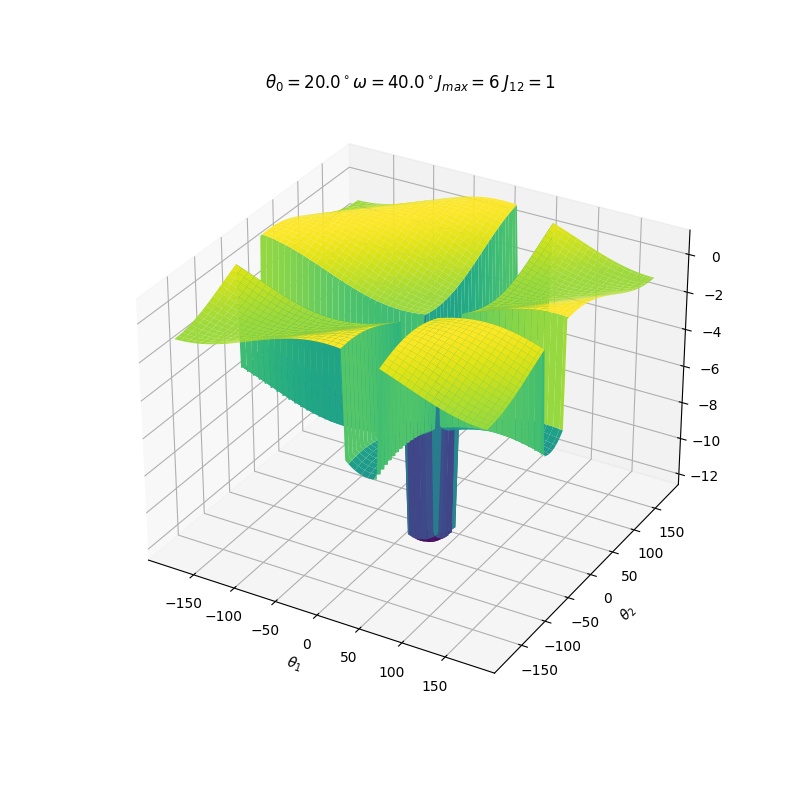

In [10]:
# potential
def potential_tindip(theta1, theta2, J12, Jmax, omega, theta0):
    return -J12*np.cos(theta1-theta2)-Jmax*np.cos(theta1-omega)*np.heaviside(theta0-abs(theta1-omega), 1)-Jmax*np.cos(theta2+omega)*np.heaviside(theta0-abs(theta2+omega), 1)

# plot the potential
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# create a meshgrid of theta1 and theta2
theta1 = np.linspace(-np.pi, np.pi, 100)
theta2 = np.linspace(-np.pi, np.pi, 100)
theta1, theta2 = np.meshgrid(theta1, theta2)

# define the parameters
J12 = 1
Jmax = 6
omega = np.radians(40)
theta0 = np.radians(20)

# plot the potential
V = potential_tindip(theta1, theta2, J12, Jmax, omega, theta0)
ax.plot_surface(np.degrees(theta1), np.degrees(theta2), V, cmap='viridis', edgecolor='none')
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')
ax.set_title(r'$\theta_0 = $' + str(np.round(np.degrees(theta0), 2)) + r'$^\circ$' + r'$ \omega = $' + str(np.round(np.degrees(omega), 2)) + r'$^\circ J_{max} = $' + str(Jmax) + r' $J_{12} = $' + str(J12))

# show the plot
plt.show();



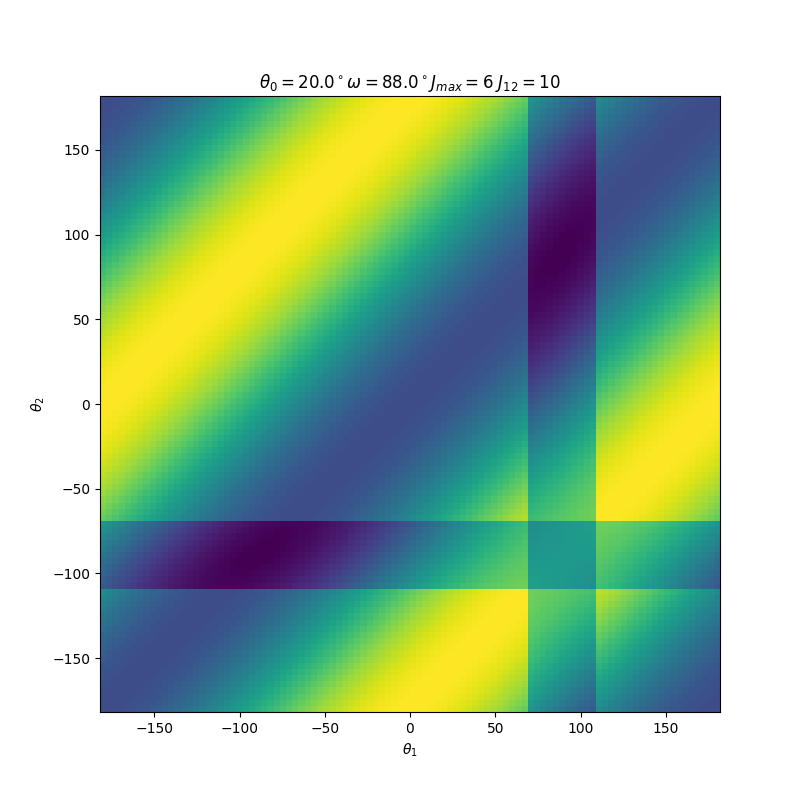

In [17]:
# create a gif of the potential for different values of omega using pcolormesh
from matplotlib import animation

# create the figure
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

# create a meshgrid of theta1 and theta2
theta1 = np.linspace(-np.pi, np.pi, 100)
theta2 = np.linspace(-np.pi, np.pi, 100)
theta1, theta2 = np.meshgrid(theta1, theta2)

# define the parameters
J12 = 10
Jmax = 6
theta0 = np.radians(20)

# create the potential function
def potential_tindip(theta1, theta2, J12, Jmax, omega, theta0):
    return -J12*np.cos(theta1-theta2)-Jmax*np.cos(theta1-omega)*np.heaviside(theta0-abs(theta1-omega), 1)-Jmax*np.cos(theta2+omega)*np.heaviside(theta0-abs(theta2+omega), 1)

# create the plot
def plot_potential(i):
    # clear the plot
    ax.clear()
    # define the omega value
    omega = np.radians(i)
    # plot the potential
    V = potential_tindip(theta1, theta2, J12, Jmax, omega, theta0)
    ax.pcolormesh(np.degrees(theta1), np.degrees(theta2), V, cmap='viridis', edgecolor='none')
    ax.set_xlabel(r'$\theta_1$')
    ax.set_ylabel(r'$\theta_2$')
    ax.set_title(r'$\theta_0 = $' + str(np.round(np.degrees(theta0), 2)) + r'$^\circ$' + r'$ \omega = $' + str(np.round(np.degrees(omega), 2)) + r'$^\circ J_{max} = $' + str(Jmax) + r' $J_{12} = $' + str(J12))

# create the animation
anim = animation.FuncAnimation(fig, plot_potential, frames=np.arange(0, 90, 2), interval=100);

# save the animation as mp4
Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=1800)
anim.save('img/potential_tindip_J12>Jmax.mp4', writer=writer)
#anim.save('img/potential_tindip.mp4', writer='imagemagick', fps=5)

#anim.save('img/potential_tindip.mp4', writer='imagemagick', fps=5)


{'J12': '3', 'Jmax': '6', 'theta0': 20.0}


Text(0.5, 1.0, 'J12 = 3, Jmax = 6, theta0 = 20.0°\n')

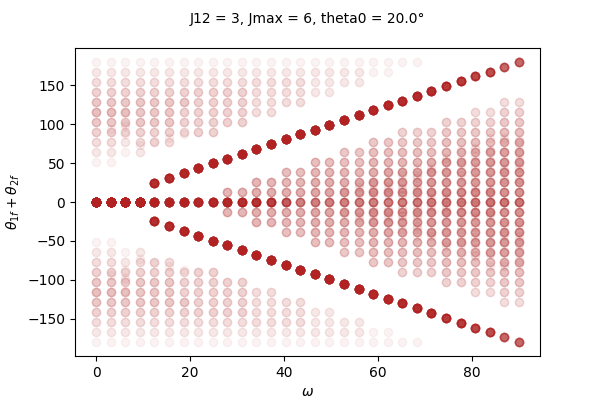

In [14]:
# Filename we want to analyze
filename = 'res_tindip/J123_Jm6_t20.0.txt'

with open(filename, 'r') as file:
    header = file.readline().strip().split()  # get variable names from first line
    values = file.readline().strip().split()  # get values from second line
    parameters = dict(zip(header, values))  # create a dictionary with variable names as keys and values as values

# convert theta0 to degrees
parameters['theta0'] = np.degrees(float(parameters['theta0']))
#omega_thres = .5*np.degrees(np.arccos(-float(parameters['Jmax'])/(2*float(parameters['J12']))))
print(parameters)
#print(omega_thres)

# Create a figure with a 2x2 grid
fig = plt.figure(figsize=(6, 4))

# plot the results from the file using pandas
df = pd.read_csv(filename, sep='\t', skiprows=3)

for x in np.unique(df['omega'], axis=0):
    plt.scatter(np.degrees(df[df['omega'] == x]['omega']), np.degrees(df[df['omega'] == x]['theta1_f'])+np.degrees(df[df['omega'] == x]['theta2_f']), label=f'omega = {np.degrees(x)}', alpha=0.05, c='firebrick')

# Set the x and y labels
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\theta_{1f} + \theta_{2f}$')

# set the title with the parameters J12, Jmax, and theta0
plt.title(f'J12 = {parameters["J12"]}, Jmax = {parameters["Jmax"]}, theta0 = {parameters["theta0"]}°\n', fontsize=10)





# for x in np.unique(df['omega'], axis=0):
#     ax1.scatter(np.degrees(df[df['omega'] == x]['omega']), np.degrees(df[df['omega'] == x]['theta1_f'])+np.degrees(df[df['omega'] == x]['theta2_f']), label=f'omega = {np.degrees(x)}', alpha=0.05, c='firebrick')
#     ax2.scatter(np.degrees(df[df['omega'] == x]['omega']), df[df['omega'] == x]['J1_f'], label=f'omega = {np.degrees(x)}', alpha=0.05, c='b')
#     ax3.scatter(np.degrees(df[df['omega'] == x]['omega']), df[df['omega'] == x]['J2_f'], label=f'omega = {np.degrees(x)}', alpha=0.05, c='b')
    
# ax1.set_ylabel(r'$\theta_{1f} + \theta_{2f}$')
# # plot vertical lines for omega_thres
# ax1.axvline(x=omega_thres, c='k', ls='--', label=f'omega_thres = {omega_thres:.2f}°')
# ax2.set_ylabel(r'$J_{1f}$')
# ax3.set_ylabel(r'$J_{2f}$')
# ax3.set_xlabel(r'$\omega$')

# # set the title with the parameters J12, Jmax, and theta0
# fig.suptitle(f'J12 = {parameters["J12"]}, Jmax = {parameters["Jmax"]}, Jinit = {parameters["Jinit"]}, theta0 = {parameters["theta0"]}°\n', fontsize=10)

# # save the figure as pdf with the parameters in the name
# #fig.savefig(f'img/ode_{parameters["J12"]}_{parameters["Jmax"]}_{parameters["theta0"]}.pdf', bbox_inches='tight', dpi=300);